# Sobre

Nas últimas eleições presidenciais, o Brasil testemunhou um momento histórico e crucial de sua democracia, com a escolha do líder máximo do país para os próximos anos. Com base em dados obtidos diretamente do Tribunal Superior Eleitoral (TSE), este projeto de análise buscou explorar e compreender os resultados eleitorais, fornecendo insights valiosos sobre a distribuição dos votos e as preferências do eleitorado brasileiro.

Ao longo do estudo, diversas análises foram realizadas, destacando-se os principais resultados alcançados em cada etapa. Iniciando com a análise da quantidade de votos obtidos por cada candidato, foi possível traçar um panorama geral das preferências dos eleitores, identificando os candidatos que receberam maior apoio em âmbito nacional.

Além disso, foram monitoradas as atualizações da apuração das urnas, permitindo uma visualização dinâmica do processo eleitoral em tempo real. Essa abordagem revelou os momentos em que os candidatos apresentaram crescimento ou declínio em suas votações, proporcionando uma compreensão mais completa do ritmo e da evolução das eleições.

Uma análise aprofundada dos candidatos mais votados por município trouxe à tona padrões regionais interessantes, mostrando como as preferências eleitorais variaram de acordo com a localização geográfica. Através da comparação dos resultados entre o primeiro e segundo turno, observou-se nuances complexas nas escolhas dos eleitores, com alguns candidatos ganhando em maior número de municípios, mas enfrentando desafios em áreas estratégicas.

Cada análise realizada contribuiu para uma compreensão mais profunda das eleições presidenciais, destacando a importância de explorar as dinâmicas regionais e as estratégias de campanha adotadas pelos candidatos. Vale ressaltar que todas as informações foram obtidas de fontes oficiais e confiáveis do TSE, garantindo a precisão e a credibilidade dos resultados apresentados.

Com essas análises em mãos, espero contribuir para um melhor entendimento do cenário político do país, fornecendo dados relevantes para a tomada de decisões informadas e promovendo uma análise objetiva e imparcial das eleições presidenciais mais recentes. O presente projeto é uma jornada de descobertas e insights que busca ampliar o conhecimento sobre o processo democrático brasileiro e suas particularidades regionais, proporcionando um olhar crítico sobre a representatividade e a participação ativa da sociedade no rumo do país.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as pltDate
import geopandas as gpd

### Importando base de dados - Histórico totalização Presidentes

Essa base de dados se trata da totalização dos votos de cada candidato nas eleições presidenciais de 2022, e pode ser obtido no seguinte site: https://dadosabertos.tse.jus.br/dataset/resultados-2022

In [29]:
df_tot1 = pd.read_csv('Historico_Totalizacao_Presidente_BR_1T_2022.csv', sep=';', encoding='latin1', decimal=',')

In [2]:
df_tot2 = pd.read_csv('Historico_Totalizacao_Presidente_BR_2T_2022.csv', sep=';', encoding='latin1', decimal=',')

# Analisando 1º Turno das eleições 

In [12]:
#Analisando as iformações gerais do dataframe
df_tot1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8437 entries, 2022-10-02 17:04:47 to 2022-10-04 10:27:34
Data columns (total 51 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   DT_TOTALIZACAO                                 8437 non-null   object 
 1   QT_SECOES_TOTAL                                8437 non-null   int64  
 2   QT_APTOS_TOTAL                                 8437 non-null   int64  
 3   QT_SECOES_TOT                                  8437 non-null   int64  
 4   QT_SECOES_TOT_ACUMULADO                        8437 non-null   int64  
 5   PE_SECOES_TOT_ACUMULADO                        8437 non-null   float64
 6   QT_APTOS_TOT                                   8437 non-null   int64  
 7   QT_APTOS_TOT_ACUMULADO                         8437 non-null   int64  
 8   QT_VOTOS_TOTAL                                 8437 non-null   int64  
 9   QT_VOTOS_TOTAL_A

In [70]:
df_tot1.columns

Index(['DT_TOTALIZACAO     ', 'QT_SECOES_TOTAL', 'QT_APTOS_TOTAL',
       'QT_SECOES_TOT', 'QT_SECOES_TOT_ACUMULADO',
       'PE_SECOES_TOT_ACUMULADO                      ', 'QT_APTOS_TOT',
       'QT_APTOS_TOT_ACUMULADO', 'QT_VOTOS_TOTAL', 'QT_VOTOS_TOTAL_ACUMULADO',
       'QT_VOTOS_CONCORRENTES', 'QT_VOTOS_CONCORRENTES_ACUMULADO',
       'CIRO_GOMES_QT_VOTOS_TOT', 'CIRO_GOMES_QT_VOTOS_TOT_ACUMULADO',
       'CIRO_GOMES_PE_VOTOS_TOT_ACUMULADO            ', 'LULA_QT_VOTOS_TOT',
       'LULA_QT_VOTOS_TOT_ACUMULADO',
       'LULA_PE_VOTOS_TOT_ACUMULADO                  ',
       'PADRE_KELMON_QT_VOTOS_TOT', 'PADRE_KELMON_QT_VOTOS_TOT_ACUMULADO',
       'PADRE_KELMON_PE_VOTOS_TOT_ACUMULADO          ',
       'SIMONE_TEBET_QT_VOTOS_TOT', 'SIMONE_TEBET_QT_VOTOS_TOT_ACUMULADO',
       'SIMONE_TEBET_PE_VOTOS_TOT_ACUMULADO          ', 'VERA_QT_VOTOS_TOT',
       'VERA_QT_VOTOS_TOT_ACUMULADO',
       'VERA_PE_VOTOS_TOT_ACUMULADO                  ',
       'SOFIA_MANZANO_QT_VOTOS_TOT', 'SOFIA_M

In [5]:
#Será necessário alterar o tipo da coluna DT_TOTALIZACAO, já que o python não identificou que se trata de uma coluna do tipo datetime
df_tot1['data'] = pd.to_datetime(df_tot1['DT_TOTALIZACAO     '], format='%d/%m/%Y %H:%M:%S')
df_tot1.set_index('data', inplace=True)

### verificando a quantidade de votos de cada candidato

In [30]:
df_tot1[['CIRO_GOMES_QT_VOTOS_TOT', 'LULA_QT_VOTOS_TOT', 'PADRE_KELMON_QT_VOTOS_TOT', 'SIMONE_TEBET_QT_VOTOS_TOT', 'VERA_QT_VOTOS_TOT', 'SOFIA_MANZANO_QT_VOTOS_TOT', 'JAIR_BOLSONARO_QT_VOTOS_TOT', 'CONSTITUINTE_EYMAEL_QT_VOTOS_TOT', 'FELIPE_DAVILA_QT_VOTOS_TOT', 'SORAYA_THRONICKE_QT_VOTOS_TOT', 'LEO_PERICLES_QT_VOTOS_TOT', 'BRANCO_QT_VOTOS_TOT', 'NULO_QT_VOTOS_TOT']].sum().sort_values(ascending=False)


LULA_QT_VOTOS_TOT                   57259504
JAIR_BOLSONARO_QT_VOTOS_TOT         51072345
SIMONE_TEBET_QT_VOTOS_TOT            4915423
CIRO_GOMES_QT_VOTOS_TOT              3599287
NULO_QT_VOTOS_TOT                    3487874
BRANCO_QT_VOTOS_TOT                  1964779
SORAYA_THRONICKE_QT_VOTOS_TOT         600955
FELIPE_DAVILA_QT_VOTOS_TOT            559708
PADRE_KELMON_QT_VOTOS_TOT              81129
LEO_PERICLES_QT_VOTOS_TOT              53519
SOFIA_MANZANO_QT_VOTOS_TOT             45620
VERA_QT_VOTOS_TOT                      25625
CONSTITUINTE_EYMAEL_QT_VOTOS_TOT       16604
dtype: int64

# Verificando a atualização da quantidade dos votos conforme cada apuração

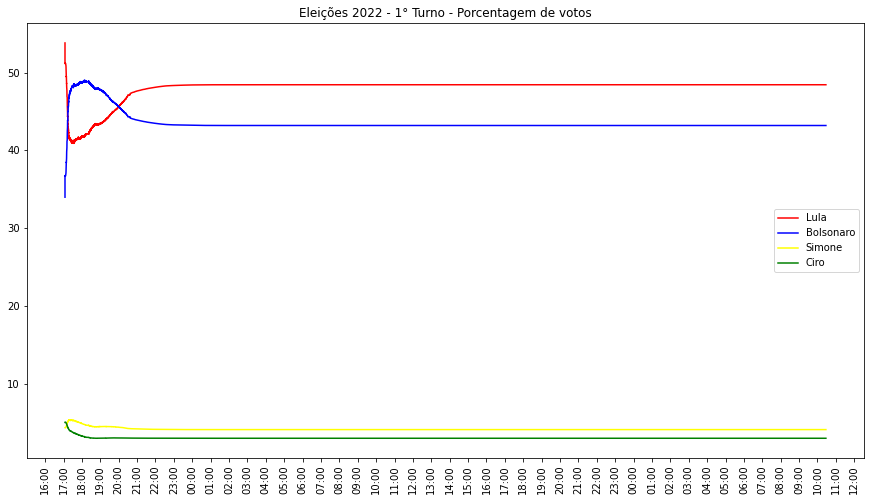

In [80]:
y1 = 'LULA_PE_VOTOS_TOT_ACUMULADO                  '
y2 = 'JAIR_BOLSONARO_PE_VOTOS_TOT_ACUMULADO        '
y3 = 'SIMONE_TEBET_PE_VOTOS_TOT_ACUMULADO          '
y4 = 'CIRO_GOMES_PE_VOTOS_TOT_ACUMULADO            '

fig, ax =  plt.subplots(figsize=(15,8))
ax.plot(df_tot1.index, df_tot1[y1]*100, label = 'Lula', color='red')
ax.plot(df_tot1.index, df_tot1[y2]*100, label = 'Bolsonaro', color='blue')
ax.plot(df_tot1.index, df_tot1[y3]*100, label = 'Simone', color ='yellow')
ax.plot(df_tot1.index, df_tot1[y4]*100, label = 'Ciro', color='green')

dataFormato = pltDate.DateFormatter("%H:%M")
ax.xaxis.set_major_locator(pltDate.HourLocator(interval=1))
ax.xaxis.set_major_formatter(dataFormato)
ax.xaxis.set_tick_params(labelrotation=90)

ax.set_title('Eleições 2022 - 1° Turno - Porcentagem de votos')
ax.legend();

O gráfico traça a trajetória dos principais candidatos ao longo do período de apuração, oferecendo uma perspectiva visual das mudanças no cenário eleitoral ao longo da noite.

A análise inicial revelou que, durante a apuração dos votos até as 20:00, o candidato Jair Messias Bolsonaro despontou na frente, consolidando uma liderança inicial no processo eleitoral. Essa tendência inicial pode ser reflexo dos resultados das regiões cujas apurações foram mais rápidas ou favoráveis ao candidato.

No entanto, uma reviravolta significativa aconteceu após as 20:00. O candidato luiz inácio lula da silva começou a ganhar força, ultrapassando Bolsonaro e alcançando a liderança. O crescimento ascendente do percentual de votos de Lula pode indicar um forte apoio em regiões estratégicas ou em segmentos-chave do eleitorado.

Após as 22:00, as apurações passaram a não causar grandes oscilações no percentual de votos dos candidatos. Isso pode indicar que a grande maioria das regiões já tiveram seus votos contabilizados e que o cenário eleitoral se estabilizou, consolidando a vantagem de Lula.

É importante notar que os demais candidatos, em contrapartida, mantiveram seus percentuais de votos constantes durante toda a apuração. Isso sugere que, após a fase inicial da contagem, não houve mudanças significativas na distribuição dos votos entre esses candidatos.

# Analisando votos por município

In [2]:
df_secao = pd.read_csv('votacao_candidato_munzona_2022_BR.csv', sep=';', encoding='latin1', decimal=',')
df_secao.columns

Index(['DT_GERACAO', 'HH_GERACAO', 'ANO_ELEICAO', 'CD_TIPO_ELEICAO',
       'NM_TIPO_ELEICAO', 'NR_TURNO', 'CD_ELEICAO', 'DS_ELEICAO', 'DT_ELEICAO',
       'TP_ABRANGENCIA', 'SG_UF', 'SG_UE', 'NM_UE', 'CD_MUNICIPIO',
       'NM_MUNICIPIO', 'NR_ZONA', 'CD_CARGO', 'DS_CARGO', 'SQ_CANDIDATO',
       'NR_CANDIDATO', 'NM_CANDIDATO', 'NM_URNA_CANDIDATO',
       'NM_SOCIAL_CANDIDATO', 'CD_SITUACAO_CANDIDATURA',
       'DS_SITUACAO_CANDIDATURA', 'CD_DETALHE_SITUACAO_CAND',
       'DS_DETALHE_SITUACAO_CAND', 'TP_AGREMIACAO', 'NR_PARTIDO', 'SG_PARTIDO',
       'NM_PARTIDO', 'NR_FEDERACAO', 'NM_FEDERACAO', 'SG_FEDERACAO',
       'DS_COMPOSICAO_FEDERACAO', 'SQ_COLIGACAO', 'NM_COLIGACAO',
       'DS_COMPOSICAO_COLIGACAO', 'ST_VOTO_EM_TRANSITO', 'QT_VOTOS_NOMINAIS',
       'NM_TIPO_DESTINACAO_VOTOS', 'QT_VOTOS_NOMINAIS_VALIDOS',
       'CD_SIT_TOT_TURNO', 'DS_SIT_TOT_TURNO'],
      dtype='object')

In [3]:
#Criando dataframe para os votos do primeiro turno
df_secao_1t = df_secao.query('NR_TURNO == 1')
df_secao_1t

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,TP_ABRANGENCIA,...,DS_COMPOSICAO_FEDERACAO,SQ_COLIGACAO,NM_COLIGACAO,DS_COMPOSICAO_COLIGACAO,ST_VOTO_EM_TRANSITO,QT_VOTOS_NOMINAIS,NM_TIPO_DESTINACAO_VOTOS,QT_VOTOS_NOMINAIS_VALIDOS,CD_SIT_TOT_TURNO,DS_SIT_TOT_TURNO
47,19/07/2023,20:59:59,2022,2,Eleição Ordinária,1,544,Eleição Geral Federal 2022,02/10/2022,F,...,#NULO#,280001681612,PARTIDO ISOLADO,PDT,N,83,Válido,83,4,NÃO ELEITO
48,19/07/2023,20:59:59,2022,2,Eleição Ordinária,1,544,Eleição Geral Federal 2022,02/10/2022,F,...,#NULO#,280001681612,PARTIDO ISOLADO,PDT,N,193,Válido,193,4,NÃO ELEITO
49,19/07/2023,20:59:59,2022,2,Eleição Ordinária,1,544,Eleição Geral Federal 2022,02/10/2022,F,...,#NULO#,280001681612,PARTIDO ISOLADO,PDT,N,52,Válido,52,4,NÃO ELEITO
50,19/07/2023,20:59:59,2022,2,Eleição Ordinária,1,544,Eleição Geral Federal 2022,02/10/2022,F,...,#NULO#,280001681612,PARTIDO ISOLADO,PDT,N,34,Válido,34,4,NÃO ELEITO
51,19/07/2023,20:59:59,2022,2,Eleição Ordinária,1,544,Eleição Geral Federal 2022,02/10/2022,F,...,#NULO#,280001681612,PARTIDO ISOLADO,PDT,N,126,Válido,126,4,NÃO ELEITO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81670,19/07/2023,20:59:59,2022,2,Eleição Ordinária,1,544,Eleição Geral Federal 2022,02/10/2022,F,...,#NULO#,280001681210,PARTIDO ISOLADO,NOVO,N,4,Válido,4,4,NÃO ELEITO
81671,19/07/2023,20:59:59,2022,2,Eleição Ordinária,1,544,Eleição Geral Federal 2022,02/10/2022,F,...,#NULO#,280001681210,PARTIDO ISOLADO,NOVO,N,46,Válido,46,4,NÃO ELEITO
81672,19/07/2023,20:59:59,2022,2,Eleição Ordinária,1,544,Eleição Geral Federal 2022,02/10/2022,F,...,#NULO#,280001681210,PARTIDO ISOLADO,NOVO,N,0,Válido,0,4,NÃO ELEITO
81673,19/07/2023,20:59:59,2022,2,Eleição Ordinária,1,544,Eleição Geral Federal 2022,02/10/2022,F,...,#NULO#,280001681210,PARTIDO ISOLADO,NOVO,N,0,Válido,0,4,NÃO ELEITO


In [32]:
#Verificando nome dos candidatos
df_secao_1t['NM_CANDIDATO'].unique()

array(['CIRO FERREIRA GOMES', 'LUIZ INÁCIO LULA DA SILVA',
       'SIMONE NASSAR TEBET', 'JAIR MESSIAS BOLSONARO',
       'SORAYA VIEIRA THRONICKE', 'LEONARDO PÉRICLES VIEIRA ROQUE',
       'KELMON LUIS DA SILVA SOUZA',
       'VERA LUCIA PEREIRA DA SILVA SALGADO', 'SOFIA PADUA MANZANO',
       'JOSE MARIA EYMAEL', 'LUIZ FELIPE CHAVES D AVILA'], dtype=object)

### Verificando graficamente a quantidade de votos de cada candidato

<AxesSubplot:title={'center':'Candidatos Mais Votados 2022'}, xlabel='NM_CANDIDATO'>

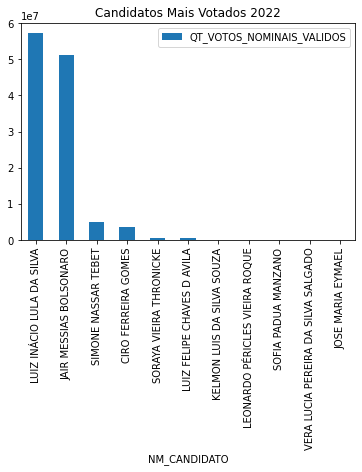

In [29]:
cand_maisVotados = df_secao_1t[['NM_CANDIDATO', 'QT_VOTOS_NOMINAIS_VALIDOS']].groupby('NM_CANDIDATO').sum().sort_values(by='QT_VOTOS_NOMINAIS_VALIDOS', ascending=False)
cand_maisVotados.plot(kind='bar',title='Candidatos Mais Votados 2022')

No gráfico acima podemos ver graficamente a quantidade de votos de cada candidato a presidência.
Essa representação gráfica possibilita uma rápida comparação entre os candidatos, permitindo identificar facilmente o candidato mais votado e sua vantagem em relação aos demais concorrentes.

### Estatística descritiva dos candidatos mais votados

In [60]:
# Estatistica descritiva sobre a quantidade de votos recebidos do candidado Jair Messias Bolsonaro por zona eleitoral
df_secao_1t_jmb = df_secao_1t.query('NR_CANDIDATO==22')
df_secao_1t_jmb['QT_VOTOS_NOMINAIS_VALIDOS'].describe()

count     6283.000000
mean      8128.655897
std      12841.442462
min          0.000000
25%       1168.500000
50%       2487.000000
75%       7398.000000
max      88034.000000
Name: QT_VOTOS_NOMINAIS_VALIDOS, dtype: float64

In [61]:
# Estatistica descritiva sobre a quantidade de votos recebidos do candidado luiz inácio lula da silva por zona eleitoral
df_secao_1t_jmb = df_secao_1t.query('NR_CANDIDATO==13')
df_secao_1t_jmb['QT_VOTOS_NOMINAIS_VALIDOS'].describe()

count      6283.000000
mean       9113.401878
std       12461.228494
min           0.000000
25%        1849.500000
50%        4034.000000
75%       10079.500000
max      131030.000000
Name: QT_VOTOS_NOMINAIS_VALIDOS, dtype: float64

# Candidatos mais votados por município

In [4]:
candidatos_mais_votados_1t = df_secao_1t[df_secao_1t['SG_UE']=='BR']\
.groupby(['NR_CANDIDATO','NM_MUNICIPIO'])\
.agg({'NM_URNA_CANDIDATO' :'first', 'NM_MUNICIPIO' :'first', 'CD_MUNICIPIO' :'first', 
      'DS_SIT_TOT_TURNO' :'first', 'NR_PARTIDO' :'first',
      'SG_PARTIDO' :'first','QT_VOTOS_NOMINAIS_VALIDOS' : 'sum' })\
      .sort_values(by='QT_VOTOS_NOMINAIS_VALIDOS',ascending=False)\
      .drop_duplicates(subset=['CD_MUNICIPIO'],keep='first')
candidatos_mais_votados_1t

NM_URNA_CANDIDATO    NM_MUNICIPIO  CD_MUNICIPIO  \
NR_CANDIDATO NM_MUNICIPIO                                                     
13           SÃO PAULO                   LULA       SÃO PAULO         71072   
22           RIO DE JANEIRO    JAIR BOLSONARO  RIO DE JANEIRO         60011   
13           SALVADOR                    LULA        SALVADOR         38490   
22           BRASÍLIA          JAIR BOLSONARO        BRASÍLIA         97012   
13           FORTALEZA                   LULA       FORTALEZA         13897   
...                                       ...             ...           ...   
12           KIEV                  CIRO GOMES            KIEV         29858   
             DAMASCO               CIRO GOMES         DAMASCO         29637   
13           COTONOU                     LULA         COTONOU         38920   
             HARARE                      LULA          HARARE         29769   
             GABORONE                    LULA        GABORONE         30669   

                            DS_SIT_TOT_TURNO  NR_PARTIDO SG_PARTIDO  \
NR_CANDIDATO NM_MUNICIPIO                                             
13           SÃO PAULO              2º TURNO          13         PT   
22           RIO DE JANEIRO         2º TURNO          22         PL   
13           SALVADOR               2º TURNO          13         PT   
22           BRASÍLIA               2º TURNO          22         PL   
13           FORTALEZA              2º TURNO          13         PT   
...                                      ...         ...        ...   
12           KIEV                 NÃO ELEITO          12        PDT   
             DAMASCO              NÃO ELEITO          12        PDT   
13           COTONOU                2º TURNO          13         PT   
             HARARE                 2º TURNO          13         PT   
             GABORONE               2º TURNO          13         PT   

                             QT_VOTOS_NOMINAIS_VALIDOS  
NR_CANDIDATO NM_MUNICIPIO                               
13           SÃO PAULO                         3276512  
22           RIO DE JANEIRO                    1695777  
13           SALVADOR                          1022728  
22           BRASÍLIA                           910397  
13           FORTALEZA                          802009  
...                                                ...  
12           KIEV                                    0  
             DAMASCO                                 0  
13           COTONOU                                 0  
             HARARE                                  0  
             GABORONE                                0  

[5747 rows x 7 columns]

## Gráfico dos candidatos mais votados por município

In [5]:
df_mun = gpd.read_file('BR_Municipios_2019.shp')
df_mun

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry
0,1100015,Alta Floresta D'Oeste,RO,7067.025,"POLYGON ((-62.22630 -11.89037, -62.20670 -11.8..."
1,1100023,Ariquemes,RO,4426.571,"POLYGON ((-63.58751 -9.84984, -63.58715 -9.849..."
2,1100031,Cabixi,RO,1314.352,"POLYGON ((-60.71834 -13.39058, -60.70904 -13.3..."
3,1100049,Cacoal,RO,3792.892,"POLYGON ((-61.50114 -11.30119, -61.50104 -11.2..."
4,1100056,Cerejeiras,RO,2783.300,"POLYGON ((-61.51346 -13.28575, -61.51534 -13.2..."
...,...,...,...,...,...
5567,5222005,Vianópolis,GO,954.284,"POLYGON ((-48.53842 -16.75003, -48.54051 -16.7..."
5568,5222054,Vicentinópolis,GO,737.255,"POLYGON ((-49.90713 -17.61460, -49.90588 -17.6..."
5569,5222203,Vila Boa,GO,1060.172,"POLYGON ((-47.07742 -15.06330, -47.07747 -15.0..."
5570,5222302,Vila Propício,GO,2181.583,"POLYGON ((-48.91463 -15.20939, -48.91462 -15.2..."


## Tratando e cruzando os dados

Será empregando abordagem de análise de dados conhecida como cruzamento de dados. Essa técnica permitirá criar um gráfico de mapa detalhado e informativo, proporcionando insights geográficos sobre os resultados eleitorais.

Ao realizar o cruzamento de dados, irei combinar informações de votação com dados geográficos relevantes, como divisões de municípios ou distritos eleitorais. Desse modo, poderemos visualizar de forma clara e precisa a distribuição dos votos de cada candidato em diferentes áreas do país.

In [6]:
df_mun1 = df_mun
df_mun1['NM_MUN'] = df_mun1['NM_MUN'].str.upper()
candidatos_mais_votados_1t.reset_index(drop=True, inplace=True)
candidatos_mais_votados_1t_mun = df_mun1.merge(candidatos_mais_votados_1t, left_on='NM_MUN', right_on='NM_MUNICIPIO')
candidatos_mais_votados_1t_mun.drop_duplicates('NM_MUN')

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry,NM_URNA_CANDIDATO,NM_MUNICIPIO,CD_MUNICIPIO,DS_SIT_TOT_TURNO,NR_PARTIDO,SG_PARTIDO,QT_VOTOS_NOMINAIS_VALIDOS
0,1100023,ARIQUEMES,RO,4426.571,"POLYGON ((-63.58751 -9.84984, -63.58715 -9.849...",JAIR BOLSONARO,ARIQUEMES,78,2º TURNO,22,PL,36941
1,1100031,CABIXI,RO,1314.352,"POLYGON ((-60.71834 -13.39058, -60.70904 -13.3...",JAIR BOLSONARO,CABIXI,450,2º TURNO,22,PL,2206
2,1100049,CACOAL,RO,3792.892,"POLYGON ((-61.50114 -11.30119, -61.50104 -11.2...",JAIR BOLSONARO,CACOAL,94,2º TURNO,22,PL,34681
3,1100056,CEREJEIRAS,RO,2783.300,"POLYGON ((-61.51346 -13.28575, -61.51534 -13.2...",JAIR BOLSONARO,CEREJEIRAS,272,2º TURNO,22,PL,7323
4,1100064,COLORADO DO OESTE,RO,1451.060,"POLYGON ((-60.72608 -13.14060, -60.72609 -13.1...",JAIR BOLSONARO,COLORADO DO OESTE,230,2º TURNO,22,PL,6620
...,...,...,...,...,...,...,...,...,...,...,...,...
6157,5222005,VIANÓPOLIS,GO,954.284,"POLYGON ((-48.53842 -16.75003, -48.54051 -16.7...",JAIR BOLSONARO,VIANÓPOLIS,96415,2º TURNO,22,PL,4762
6158,5222054,VICENTINÓPOLIS,GO,737.255,"POLYGON ((-49.90713 -17.61460, -49.90588 -17.6...",LULA,VICENTINÓPOLIS,96571,2º TURNO,13,PT,2414
6159,5222203,VILA BOA,GO,1060.172,"POLYGON ((-47.07742 -15.06330, -47.07747 -15.0...",LULA,VILA BOA,93289,2º TURNO,13,PT,1724
6160,5222302,VILA PROPÍCIO,GO,2181.583,"POLYGON ((-48.91463 -15.20939, -48.91462 -15.2...",LULA,VILA PROPÍCIO,93505,2º TURNO,13,PT,1834


In [109]:
candidatos_mais_votados_1t

,NM_URNA_CANDIDATO,NM_MUNICIPIO,CD_MUNICIPIO,DS_SIT_TOT_TURNO,NR_PARTIDO,SG_PARTIDO,QT_VOTOS_NOMINAIS_VALIDOS
0,LULA,SÃO PAULO,71072,2º TURNO,13,PT,3276512
1,JAIR BOLSONARO,RIO DE JANEIRO,60011,2º TURNO,22,PL,1695777
2,LULA,SALVADOR,38490,2º TURNO,13,PT,1022728
3,JAIR BOLSONARO,BRASÍLIA,97012,2º TURNO,22,PL,910397
4,LULA,FORTALEZA,13897,2º TURNO,13,PT,802009
...,...,...,...,...,...,...,...
5742,CIRO GOMES,KIEV,29858,NÃO ELEITO,12,PDT,0
5743,CIRO GOMES,DAMASCO,29637,NÃO ELEITO,12,PDT,0
5744,LULA,COTONOU,38920,2º TURNO,13,PT,0
5745,LULA,HARARE,29769,2º TURNO,13,PT,0


# Candidatos mais votados por município no 1º Turno

C:\Users\andre\anaconda3\lib\site-packages\geopandas\plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


<AxesSubplot:>

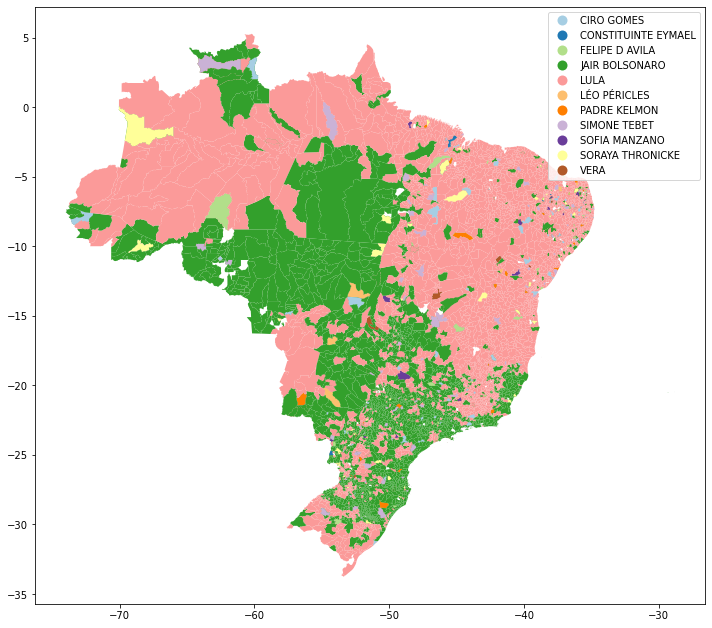

In [9]:
candidatos_mais_votados_1t_mun.plot('NM_URNA_CANDIDATO', legend=True, cmap='Paired', figsize=(12,12))

O gráfico de mapa apresenta uma análise detalhada dos candidatos mais votados em cada município durante o 1º Turno das eleições presidenciais do ano passado.

A legenda colorida indica a distribuição dos candidatos mais votados em todo o território nacional, com cada cor representando um candidato específico.

A análise do mapa revela uma variedade de padrões eleitorais. Em algumas regiões, observamos uma forte concentração de votos em um único candidato, indicando uma grande aceitação e apoio por parte dos eleitores locais. Essas áreas podem representar os redutos eleitorais dos candidatos, onde sua mensagem e propostas ressoaram fortemente com a população.

Por outro lado, em certas localidades, o mapa exibe uma diversidade de cores, mostrando uma disputa acirrada entre os candidatos mais votados. Essas regiões podem ser palco de uma competição eleitoral mais equilibrada, onde múltiplos candidatos têm um apoio significativo.

Além disso, o gráfico de mapa nos permite identificar a influência de fatores regionais nas preferências eleitorais. Por exemplo, em algumas áreas, os candidatos com propostas voltadas para temas específicos, como questões ambientais ou desenvolvimento econômico, podem ter recebido mais votos, refletindo a importância dessas pautas para a população local.

# Analisando 2º Turno das eleições 

In [4]:
#Será necessário alterar o tipo da coluna DT_TOTALIZACAO, já que o python não identificou que se trata de uma coluna do tipo datetime
df_tot2['data'] = pd.to_datetime(df_tot2['DT_TOTALIZACAO     '], format='%d/%m/%Y %H:%M:%S')
df_tot2.set_index('data', inplace=True)

 ### Verificando a apuração dos votos conforme cada atualização

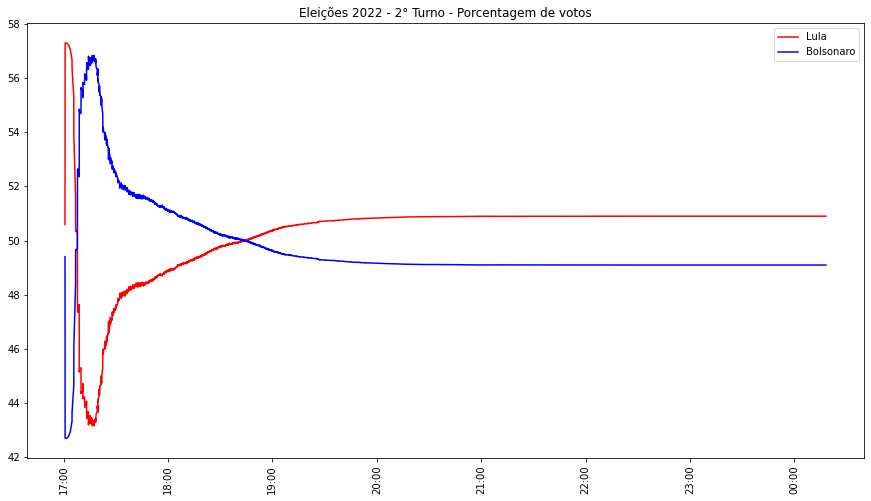

In [5]:
y1 = 'LULA_PE_VOTOS_TOT_ACUMULADO                  '
y2 = 'JAIR_BOLSONARO_PE_VOTOS_TOT_ACUMULADO        '


fig, ax =  plt.subplots(figsize=(15,8))
ax.plot(df_tot2.index, df_tot2[y1]*100,  label = 'Lula', color='red')
ax.plot(df_tot2.index, df_tot2[y2]*100, label = 'Bolsonaro', color='blue')


dataFormato = pltDate.DateFormatter("%H:%M")
ax.xaxis.set_major_locator(pltDate.HourLocator(interval=1))
ax.xaxis.set_major_formatter(dataFormato)
ax.xaxis.set_tick_params(labelrotation=90)

ax.set_title('Eleições 2022 - 2° Turno - Porcentagem de votos')
ax.legend();

O gráfico de atualizações de votos no segundo turno das eleições presidenciais apresenta uma análise que possibilita a comparação entre os dois turnos do processo eleitoral. Notavelmente, os desenhos dos gráficos do primeiro e segundo turno mostram tendências de votos semelhantes, mas com algumas diferenças importantes.

No segundo turno, podemos observar que a diferença entre os candidatos aparenta ser menor em comparação ao primeiro turno (Informação que será comprovada posteriomente). Isso pode indicar uma maior convergência de votos em relação aos dois candidatos mais votados, sugerindo que o eleitorado esteja mais dividido entre eles. Essa menor diferença entre os candidatos reflete uma competição mais acirrada, com ambos os lados disputando um apoio significativo dos eleitores. Mostrando também uma grande polarização existente no país.

Essa tendência pode ser resultado de diversas razões. Durante o segundo turno, os candidatos costumam ajustar suas estratégias de campanha para atrair eleitores que votaram em outros candidatos no primeiro turno. Isso pode levar a uma maior disputa pelos votos dos eleitores que anteriormente apoiavam outros concorrentes.

Além disso, o segundo turno normalmente é um momento em que os eleitores tendem a se concentrar mais nas diferenças de propostas e ideologias entre os candidatos restantes. Isso pode resultar em uma maior polarização dos votos em torno dos dois principais candidatos, o que pode explicar a redução da diferença percentual entre eles.

In [7]:
df_secao_2t = df_secao.query('NR_TURNO == 2')

## Verificando quantidade de votos e diferença percentual  do 1º e 2º Turno

In [8]:
cand_maisVotados_2t = df_secao_2t[['NM_CANDIDATO', 'QT_VOTOS_NOMINAIS_VALIDOS']].groupby('NM_CANDIDATO').sum().sort_values(by='QT_VOTOS_NOMINAIS_VALIDOS', ascending=False)
cand_maisVotados_2t

,QT_VOTOS_NOMINAIS_VALIDOS
NM_CANDIDATO,
LUIZ INÁCIO LULA DA SILVA,60345999
JAIR MESSIAS BOLSONARO,58206354


<AxesSubplot:xlabel='NM_CANDIDATO'>

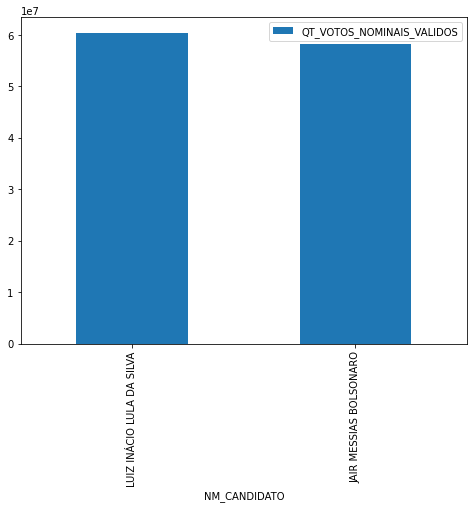

In [21]:
cand_maisVotados_2t.plot(kind='bar', figsize=(8,6))

In [76]:
cand_maisVotados_2tn = cand_maisVotados_2t/df_secao_2t['QT_VOTOS_NOMINAIS_VALIDOS'].sum()
cand_maisVotados_2tno = cand_maisVotados_2tn['QT_VOTOS_NOMINAIS_VALIDOS']
cand_maisVotados_2tn

,QT_VOTOS_NOMINAIS_VALIDOS
NM_CANDIDATO,
LUIZ INÁCIO LULA DA SILVA,0.509024
JAIR MESSIAS BOLSONARO,0.490976


### Diferença de votos entre Lula e Bolsonaro no 1º e 2 turno

In [87]:
# Filtrando os candidatos desejados no DataFrame original
cand_maisVotados = df_secao_1t[df_secao_1t['NM_CANDIDATO'].isin(['LUIZ INÁCIO LULA DA SILVA', 'JAIR MESSIAS BOLSONARO'])]

# Agrupando e calculando as proporções em relação a todos os candidatos
cand_maisVotados_1tn = cand_maisVotados.groupby('NM_CANDIDATO')['QT_VOTOS_NOMINAIS_VALIDOS'].sum() / df_secao_1t['QT_VOTOS_NOMINAIS_VALIDOS'].sum()

# Exibindo as proporções
diferenca_1t = round(cand_maisVotados_1tn.max() - cand_maisVotados_1tn.min(), 3)*100

diferenca_2t = round(cand_maisVotados_2tno.max() - cand_maisVotados_2tno.min(), 3)*100
 
print('1° turno = ' + str(diferenca_1t) + '%\n2° turno = ' + str(diferenca_2t)+'%')


1° turno = 5.2%
2° turno = 1.7999999999999998%


Com base na análise dos gráficos anteriores e nas diferenças de votos entre o primeiro e o segundo turno, podemos realizar algumas análises interessantes:

**Redução da Diferença de Votos:** A constatação de que a diferença de votos entre os candidatos no segundo turno foi menor em relação ao primeiro turno sugere uma maior polarização do eleitorado. Isso pode indicar que os dois candidatos mais votados conseguiram atrair um maior número de eleitores que anteriormente votaram em outros candidatos, tornando a disputa mais acirrada.

**Consolidação de Apoios:** A redução da diferença de votos também pode sugerir que, no segundo turno, os candidatos buscam consolidar o apoio de eleitores que apoiaram outros candidatos no primeiro turno. Isso pode levar a uma maior concentração de votos em torno dos dois principais concorrentes, com eleitores se alinhando com os candidatos que consideram mais próximos de suas preferências políticas.

# Mapa com candidatos mais votados por município no 2º Turno

### Candidatos mais votados por município 2º Turno

In [9]:
candidatos_mais_votados_2t = df_secao_2t[df_secao_2t['SG_UE']=='BR']\
.groupby(['NR_CANDIDATO','NM_MUNICIPIO'])\
.agg({'NM_URNA_CANDIDATO' :'first', 'NM_MUNICIPIO' :'first', 'CD_MUNICIPIO' :'first', 
      'DS_SIT_TOT_TURNO' :'first', 'NR_PARTIDO' :'first',
      'SG_PARTIDO' :'first','QT_VOTOS_NOMINAIS_VALIDOS' : 'sum' })\
      .sort_values(by='QT_VOTOS_NOMINAIS_VALIDOS',ascending=False)\
      .drop_duplicates(subset=['CD_MUNICIPIO'],keep='first')
candidatos_mais_votados_2t

NM_URNA_CANDIDATO    NM_MUNICIPIO  CD_MUNICIPIO  \
NR_CANDIDATO NM_MUNICIPIO                                                     
13           SÃO PAULO                   LULA       SÃO PAULO         71072   
22           RIO DE JANEIRO    JAIR BOLSONARO  RIO DE JANEIRO         60011   
13           SALVADOR                    LULA        SALVADOR         38490   
22           BRASÍLIA          JAIR BOLSONARO        BRASÍLIA         97012   
13           FORTALEZA                   LULA       FORTALEZA         13897   
...                                       ...             ...           ...   
             TBILISI                     LULA         TBILISI         99104   
22           BAMAKO            JAIR BOLSONARO          BAMAKO         99350   
             BAKU              JAIR BOLSONARO            BAKU         39128   
             BAGDÁ             JAIR BOLSONARO           BAGDÁ         99171   
             ASTANA            JAIR BOLSONARO          ASTANA         39241   

                            DS_SIT_TOT_TURNO  NR_PARTIDO SG_PARTIDO  \
NR_CANDIDATO NM_MUNICIPIO                                             
13           SÃO PAULO                ELEITO          13         PT   
22           RIO DE JANEIRO       NÃO ELEITO          22         PL   
13           SALVADOR                 ELEITO          13         PT   
22           BRASÍLIA             NÃO ELEITO          22         PL   
13           FORTALEZA                ELEITO          13         PT   
...                                      ...         ...        ...   
             TBILISI                  ELEITO          13         PT   
22           BAMAKO               NÃO ELEITO          22         PL   
             BAKU                 NÃO ELEITO          22         PL   
             BAGDÁ                NÃO ELEITO          22         PL   
             ASTANA               NÃO ELEITO          22         PL   

                             QT_VOTOS_NOMINAIS_VALIDOS  
NR_CANDIDATO NM_MUNICIPIO                               
13           SÃO PAULO                         3677921  
22           RIO DE JANEIRO                    1929209  
13           SALVADOR                          1089899  
22           BRASÍLIA                          1041331  
13           FORTALEZA                          880559  
...                                                ...  
             TBILISI                                 0  
22           BAMAKO                                  0  
             BAKU                                    0  
             BAGDÁ                                   0  
             ASTANA                                  0  

[5596 rows x 7 columns]

### Realizando cruzamento de dados para a criação do mapa

In [10]:
df_mun['NM_MUN'] = df_mun['NM_MUN'].str.upper()
candidatos_mais_votados_2t.reset_index(drop=True, inplace=True)
candidatos_mais_votados_2t_mun = df_mun.merge(candidatos_mais_votados_2t, left_on='NM_MUN', right_on='NM_MUNICIPIO')
candidatos_mais_votados_2t_mun.drop_duplicates('NM_MUN')

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry,NM_URNA_CANDIDATO,NM_MUNICIPIO,CD_MUNICIPIO,DS_SIT_TOT_TURNO,NR_PARTIDO,SG_PARTIDO,QT_VOTOS_NOMINAIS_VALIDOS
0,1100023,ARIQUEMES,RO,4426.571,"POLYGON ((-63.58751 -9.84984, -63.58715 -9.849...",JAIR BOLSONARO,ARIQUEMES,78,NÃO ELEITO,22,PL,39901
1,1100031,CABIXI,RO,1314.352,"POLYGON ((-60.71834 -13.39058, -60.70904 -13.3...",JAIR BOLSONARO,CABIXI,450,NÃO ELEITO,22,PL,2405
2,1100049,CACOAL,RO,3792.892,"POLYGON ((-61.50114 -11.30119, -61.50104 -11.2...",JAIR BOLSONARO,CACOAL,94,NÃO ELEITO,22,PL,37980
3,1100056,CEREJEIRAS,RO,2783.300,"POLYGON ((-61.51346 -13.28575, -61.51534 -13.2...",JAIR BOLSONARO,CEREJEIRAS,272,NÃO ELEITO,22,PL,7854
4,1100064,COLORADO DO OESTE,RO,1451.060,"POLYGON ((-60.72608 -13.14060, -60.72609 -13.1...",JAIR BOLSONARO,COLORADO DO OESTE,230,NÃO ELEITO,22,PL,7253
...,...,...,...,...,...,...,...,...,...,...,...,...
5784,5222005,VIANÓPOLIS,GO,954.284,"POLYGON ((-48.53842 -16.75003, -48.54051 -16.7...",JAIR BOLSONARO,VIANÓPOLIS,96415,NÃO ELEITO,22,PL,5618
5785,5222054,VICENTINÓPOLIS,GO,737.255,"POLYGON ((-49.90713 -17.61460, -49.90588 -17.6...",JAIR BOLSONARO,VICENTINÓPOLIS,96571,NÃO ELEITO,22,PL,2613
5786,5222203,VILA BOA,GO,1060.172,"POLYGON ((-47.07742 -15.06330, -47.07747 -15.0...",LULA,VILA BOA,93289,ELEITO,13,PT,1721
5787,5222302,VILA PROPÍCIO,GO,2181.583,"POLYGON ((-48.91463 -15.20939, -48.91462 -15.2...",JAIR BOLSONARO,VILA PROPÍCIO,93505,NÃO ELEITO,22,PL,1959


# Mapa de candidatos mais votados por município

C:\Users\andre\anaconda3\lib\site-packages\geopandas\plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


<AxesSubplot:>

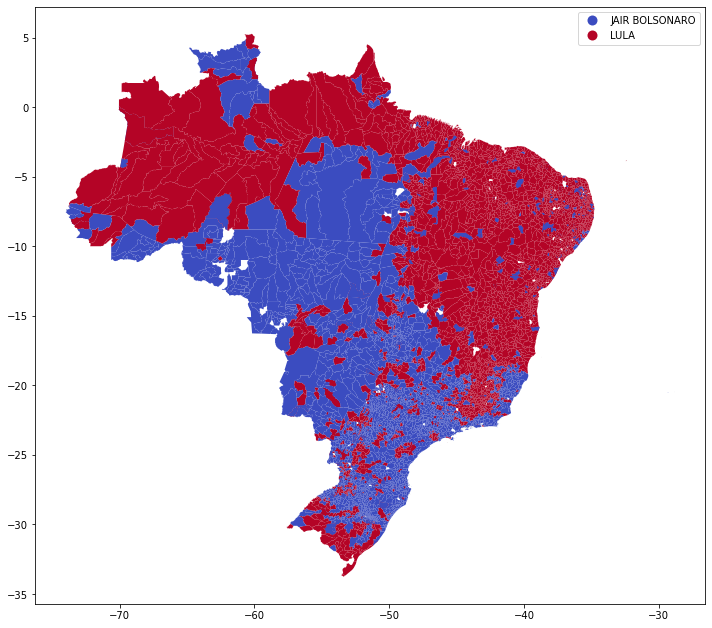

In [104]:
candidatos_mais_votados_2t_mun.plot('NM_URNA_CANDIDATO', legend=True, cmap='coolwarm', figsize=(12,12))

# Mapa 1º e 2º turno

C:\Users\andre\anaconda3\lib\site-packages\geopandas\plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:
C:\Users\andre\anaconda3\lib\site-packages\geopandas\plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


<AxesSubplot:title={'center':'Candidatos Mais Votados 2° Turno'}>

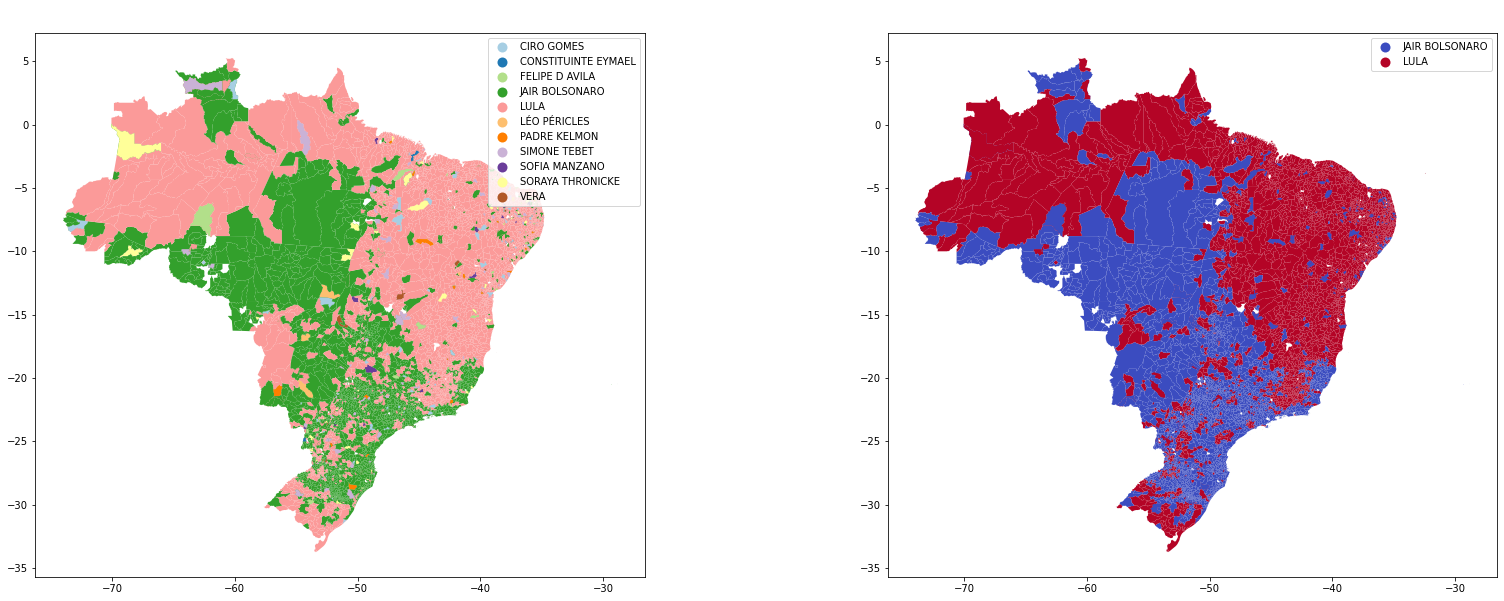

In [12]:
fig, ax = plt.subplots(1,2,figsize=(28,10))
ax[0].set_title('Candidatos Mais Votados 1° Turno', color='white', size=26)
ax[1].set_title('Candidatos Mais Votados 2° Turno', color='white', size=26)

candidatos_mais_votados_1t_mun.plot('NM_URNA_CANDIDATO', legend=True, cmap='Paired', ax=ax[0])
candidatos_mais_votados_2t_mun.plot('NM_URNA_CANDIDATO', legend=True, cmap='coolwarm', ax=ax[1])

In [20]:
MaisVotadosPorMunicipio_1t = candidatos_mais_votados_1t_mun[['CD_MUN', 'NM_URNA_CANDIDATO']].groupby('NM_URNA_CANDIDATO').count()
MaisVotadosPorMunicipio_2t = candidatos_mais_votados_2t_mun[['CD_MUN', 'NM_URNA_CANDIDATO']].groupby('NM_URNA_CANDIDATO').count()

## Quantidade de municípios em que cada candidato foi o mais votado

In [27]:
display('Primeiro Turno',MaisVotadosPorMunicipio_1t, 'Segundo Turno', MaisVotadosPorMunicipio_2t)

'Primeiro Turno'

,CD_MUN
NM_URNA_CANDIDATO,
CIRO GOMES,89
CONSTITUINTE EYMAEL,6
FELIPE D AVILA,49
JAIR BOLSONARO,2330
LULA,3429
LÉO PÉRICLES,10
PADRE KELMON,23
SIMONE TEBET,141
SOFIA MANZANO,16


'Segundo Turno'

,CD_MUN
NM_URNA_CANDIDATO,
JAIR BOLSONARO,2583
LULA,3206


O gráfico de mapa "Candidatos mais votados por município no 2º Turno" apresenta uma visão detalhada e geográfica dos resultados eleitorais durante a etapa decisiva das eleições presidenciais. Ao analisar esse mapa e considerar as diferenças entre o primeiro e segundo turno, podemos obter insights valiosos sobre o cenário político e as preferências do eleitorado brasileiro.

Uma das primeiras observações importantes é a ampla distribuição geográfica de vitórias de Luiz Inácio Lula da Silva, que conquistou um maior número de municípios em relação a seu adversário, Jair Messias Bolsonaro, em ambos os turnos. Essa distribuição sugere uma abrangente aceitação e apoio a Lula em diferentes regiões do país, o que é uma indicação relevante do alcance de sua candidatura.

No entanto, ao aprofundarmos a análise, notamos que, apesar de Lula ter vencido em mais municípios, ele enfrentou desafios em algumas regiões específicas do Centro-Oeste, Sudeste e Sul. Nesses locais, Bolsonaro obteve uma densidade de votos significativa, o que indica um apoio mais expressivo em áreas-chave do país. Essa concentração de votos em favor de Bolsonaro pode ter contribuído para uma disputa acirrada mesmo com um menor número de municípios vencidos.

Essas diferenças regionais nas preferências eleitorais reforçam a polarização política no Brasil, que foi uma característica proeminente das eleições presidenciais. O mapa destaca como as escolhas dos eleitores variam consideravelmente de região para região, refletindo visões e valores políticos distintos que moldam o cenário político nacional.